In [ ]:
# I explore the cuts of the features

In [1]:
%matplotlib inline
#так тоже можно решить проблему инлайла плотов


In [3]:
import _matrixnetapplier as mnet
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
#extract ODT
fstream = open('formula.mx','rb')
classi = mnet.MatrixnetClassifier(fstream)
fstream.close()

In [5]:
#Get all the trees from .mx
def get_trees(classi):
    itr = classi.iterate_trees().next()
    return itr, [tree for tree in itr[2]]

In [6]:
#load training set
def load_data(path):
    print 'Loading training data.'
    data = np.loadtxt(path, \
            delimiter=',', \
            skiprows=1, \
            converters={32: lambda x:int(x=='s'.encode('utf-8'))})

    X = data[:,1:31]
    Y = data[:,32]
    W = data[:,31]
    return X,Y,W


In [7]:
itr,trees = get_trees(classi)
n_features = len(classi.features)
X,Y,W = load_data("../data/training.csv")

Loading training data.


(250000, 30)

In [7]:
#cut histogram visualization
cuts = lambda feature: reduce(np.append,[tree[1][tree[0] == feature] for tree in  trees])
def hist(feature,bins = 100):
    plt.legend(handles = [mpatches.Patch(label="feature" + str(feature))])
    plt.hist(cuts(feature),bins = bins)
    plt.show();

In [8]:
def trees_loss(trees,tchange_feature,tchange_range,tchange_newvalue,X,Y,W):
    """
    trees: trees as is from mnet classifier
    tchange_feature: id of threshold that have changed value
    tchange_range: [min threshold,max threshold] to be changed
    tchange_newvalue: the new threshold value
    events: pd dataframe or ndarray where each row is an event and each column - a feature
    """
    
    #which data pieces are affected:
    X_affected = X[tchange_range[0]<X[:,tchange_feature]]
    X_affected = X_affected[X_affected[:,tchange_feature]<tchange_range[1]]
    
    
def trees_classify(trees,X,bias = 0.):
    n_samples = len(X)
    n_extended64 = (n_samples + 7) // 8
    n_extended = n_extended64 * 8

    features = np.zeros([n_extended, X.shape[1]], dtype='float32', order='F')
    features[:n_samples, :] = X

    res = np.zeros(len(X), dtype=float) + bias
    for tree_features, tree_cuts, leaf_values in trees:
        leaf_indices = np.zeros(n_extended64, dtype='int64')
        for tree_level, (feature, cut) in enumerate(zip(tree_features, tree_cuts)):
            leaf_indices |= (features[:, feature] > cut).view('int64') << tree_level
            res+= leaf_values[leaf_indices.view('int8')[:n_samples]]
            print leaf_values[leaf_indices.view('int8')[:n_samples]]
    return res


In [11]:
print trees_classify(trees[:10],X[:2],classi.bias)
print '!!!!!!!!!!'
print classi.apply(X[:2])
[ 0.  0.]
[ 0.00216863  0.00216863]
[ 0.00697585  0.00697585]
[ 0.00697585  0.00697585]
[-0.0120681 -0.0120681]
[-0.0120681   0.00149099]
[-0.00555348 -0.00555348]
[ 0.00217837  0.00217837]
[ 0.00687879  0.00687879]
[ 0.00687879  0.00687879]
[-0.01194147 -0.01194147]
[-0.01194147  0.00144655]

[ 0.  0.]
[-0.0120681   0.00149099]
[-0.01194147  0.00144655]
[-0.01035513  0.00695055]
[-0.00266127  0.01141543]
[-0.00065321  0.0146044 ]
[-0.00197763  0.01233181]
[-0.01048699  0.00593385]
[-0.01175735  0.00179796]
[-0.00129617  0.01344552]
[-0.01085477  0.00197442]
[-0.01156435  0.00168693]
[-0.01101369  0.00239303]
[-0.01164318  0.00148152]
[-0.01237787  0.0002613 ]
[-0.01203306  0.00058477]
[ -1.19346604e-02  -1.72927259e-05]


[ 0.  0.]
[ 0.00216863  0.00216863]
[ 0.00697585  0.00697585]
[ 0.00697585  0.00697585]
[-0.0120681 -0.0120681]
[-0.0120681   0.00149099]
[-0.00555348 -0.00555348]
[ 0.00217837  0.00217837]
[ 0.00687879  0.00687879]
[ 0.00687879  0.00687879]
[-0.01194147 -0.01194147]
[-0.01194147  0.00144655]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.04612836  0.        ]
[-0.01035513  0.00695055]
[-0.00404529 -0.00404529]
[ 0.00400714  0.00400714]
[ 0.  0.]
[-0.01571597 -0.01571597]
[-0.00266127 -0.00266127]
[-0.00266127  0.01141543]
[-0.00059102 -0.00059102]
[ 0.00967898  0.00967898]
[ 0.01839774  0.01839774]
[ 0.00275024  0.00275024]
[-0.01283871  0.00275024]
[-0.00065321  0.0146044 ]
[-0.00717673 -0.00717673]
[ 0.  0.]
[ 0.00385634  0.00385634]
[-0.01468099 -0.01468099]
[-0.00197763 -0.00197763]
[-0.00197763  0.01233181]
[ 0.  0.]
[ 0.01847755  0.01847755]
[ 0.01847755  0.01847755]
[ 0.  0.]
[ 0.00593385  0.00593385]
[-0.01048699  0.00593385]
[ 0.00120684  0.00120684]
[ 0.0059893  0.0059893]
[-0.

KeyboardInterrupt: 

10000

In [140]:
X_affected = X[tchange_range[0]<X[:,tchange_feature]]
X_affected = X_affected[X_affected[:,tchange_feature]<tchange_range[1]]
    
trees_affected_raise = []
trees_affected_fall = []
tree = trees[0]#for tree in trees:

#ODT nodes affected by this
nodes_affected = np.where(tree[0] == tchange_feature)[0]
nodes_affected = nodes_affected[np.where(tree[1][nodes_affected]<tchange_range[1])[0]]
nodes_affected = nodes_affected[np.where(tree[1][nodes_affected]>tchange_range[0])[0]]

basic_solution = tree_classify(tree,X)

(array([  94514.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  155486.]),
 array([-0.00845677, -0.00761109, -0.00676542, -0.00591974, -0.00507406,
        -0.00422839, -0.00338271, -0.00253703, -0.00169135, -0.00084568,  0.        ]),
 <a list of 10 Patch objects>)

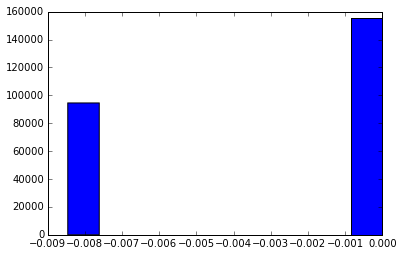

250000

In [85]:
tchange_range = [90,100]
tchange_feature = 0
tchange_newvalue = 95